# <strong>Pandas:</strong> Tips and Tricks

**Name:** Arsalan Ali<br>
**Email:** arslanchaos@gmail.com

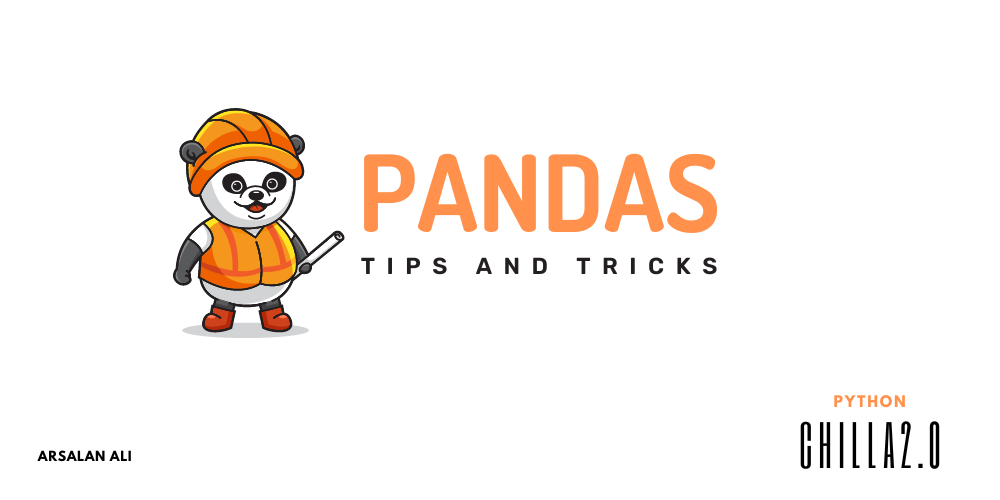

In [37]:
import pandas as pd
from IPython.display import Image
Image(filename='Banner.png')

### **Table of Contents**
* 01- Find version
* 02- Create a DataFrame
* 03- Rename Columns
* 04- Template Data
* 05- Using our Data
* 06- Reverse Row Order
* 07- Reverse Column Order
* 08- Select Column by Dtype
* 09- Convert Strings to Numbers
* 10- Reduce DataFrame Size
* 11- Copy Data From Clipboard
* 12- Split DataFrame into Two Subsets
* 13- Join Two Datasets
* 14- Filtering a Dataset
* 15- Filtering by Large Categories
* 16- Splitting a string into Multiple Columns
* 17- Aggregate by Multiple Groups/Functions
* 18- Select specific Rows or Columns
* 19- Reshape Multi-index Series
* 20- Convert Continuous to Categorical Data
* 21- Convert one set of values into another
* 22- Transpose a Wide DataFrame
* 23- Reshaping a DataFrame

----

### 01- Find version
In order to find the version of Pandas we're running. We can use the following methods.

In [2]:
# 1st method
pd.__version__

'1.4.1'

This second method is more descriptive since it gives a detailed report.

In [ ]:
# 2nd method
pd.show_versions()

### 02- Create a Dataframe
We can create dataframes in various ways 

In [9]:
# By Passing a Dictionary
df = pd.DataFrame({
    'A': [1,2,3,4,5,6],
    'B': [7,8,9,10,11,12]
})

df.head()

,A,B
0,1,7
1,2,8
2,3,9
3,4,10
4,5,11


In [16]:
# By a Numpy Array
import numpy as np
arr = np.array([
    [1,2,3],
    [4,5,6],
    [7,8,9]
])
df = pd.DataFrame(arr)
df.head()

,0,1,2
0,1,2,3
1,4,5,6
2,7,8,9


In [14]:
# By Random Numpy Array
pd.DataFrame(np.random.rand(5,8))

,0,1,2,3,4,5,6,7
0,0.423746,0.941393,0.560515,0.057676,0.814380,0.256410,0.932872,0.663507
1,0.359864,0.964584,0.392811,0.197173,0.728708,0.232640,0.506499,0.063664
2,0.750330,0.345960,0.112574,0.326428,0.213132,0.928055,0.858303,0.736651
3,0.900499,0.652258,0.206834,0.116451,0.490806,0.591238,0.639830,0.376638
4,0.052271,0.394538,0.913890,0.292392,0.312990,0.193249,0.245811,0.548104


In [15]:
# Numpy array dataframe with custom column names
pd.DataFrame(np.random.rand(5,8), columns=list('ABCDEFGH'))

,A,B,C,D,E,F,G,H
0,0.185820,0.679703,0.243590,0.469055,0.761228,0.452408,0.755774,0.247577
1,0.129872,0.678249,0.417453,0.513585,0.771179,0.316980,0.292195,0.345035
2,0.514295,0.407150,0.857607,0.084282,0.125262,0.858027,0.016116,0.858736
3,0.335685,0.558952,0.065647,0.469693,0.374573,0.233593,0.420945,0.875671
4,0.679481,0.159330,0.195668,0.185786,0.037160,0.802128,0.957652,0.850983


### 03- Rename Columns
There are a lot of ways to rename columns. We've used five methods.

In [18]:
# 1st-method
df = pd.DataFrame({
    'A': [1,2,3,4,5,6],
    'B': [7,8,9,10,11,12]
})

df.rename(columns={'A':'Hi', 'B':'Bye'}, inplace=True)

df.head()

,Hi,Bye
0,1,7
1,2,8
2,3,9
3,4,10
4,5,11


This is an easier approach but we need to know what columns we're changing beforehand.

In [21]:
# 2nd-method
df.columns = ['column_1', 'column_2']
df

,column_1,column_2
0,1,7
1,2,8
2,3,9
3,4,10
4,5,11
5,6,12


Sometimes you just want to replace some characters rather than renaming entire column name. We can use this method for that.

In [23]:
# 3rd-method: To replace any character/string
df.columns = df.columns.str.replace('_','')
df

,column1,column2
0,1,7
1,2,8
2,3,9
3,4,10
4,5,11
5,6,12


In order to add desired string before the column names

In [24]:
# 4th-method: To add prefix
df = df.add_prefix('baba_')
df

,baba_column1,baba_column2
0,1,7
1,2,8
2,3,9
3,4,10
4,5,11
5,6,12


Just like prefix we can also do it backwards using suffix. It adds string at the end

In [25]:
# 5th-method: To add suffix
df = df.add_suffix('_chilla')
df

,baba_column1_chilla,baba_column2_chilla
0,1,7
1,2,8
2,3,9
3,4,10
4,5,11
5,6,12


### 04- Template Data
Purpose of Tempate data is to act as a dummy for our experiments

In [27]:
import pandas as pd
import numpy as np
import seaborn as sns

tips = sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [30]:
# Summary (Descriptive Statistics)
tips.describe()

# Column names
tips.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

In [35]:
# Saving the dataset
tips.to_csv("tips.csv")

# pip install openpyxl
tips.to_excel("tips.xlsx")

### 05- Using our Data
We can use our own data instead of templates using 'read' commands of Pandas

In [36]:
import pandas as pd
df_csv = pd.read_csv("tips.csv")
df_excel = pd.read_excel("tips.xlsx")

# df_csv
df_excel

,Unnamed: 0,total_bill,tip,sex,smoker,day,time,size
0,0,16.99,1.01,Female,No,Sun,Dinner,2
1,1,10.34,1.66,Male,No,Sun,Dinner,3
2,2,21.01,3.50,Male,No,Sun,Dinner,3
3,3,23.68,3.31,Male,No,Sun,Dinner,2
4,4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...,...
239,239,29.03,5.92,Male,No,Sat,Dinner,3
240,240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,242,17.82,1.75,Male,No,Sat,Dinner,2


### 06- Reverse Row Order

In [3]:
import seaborn as sns
import pandas as pd

df = sns.load_dataset("titanic")
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [2]:
# To reverse all the row-values in the DataFrame
df.loc[::-1]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
890,0,3,male,32.0,0,0,7.7500,Q,Third,man,True,NaN,Queenstown,no,True
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False


In [5]:
# To re-allocate the indexes to the reversed row-valued DataFrame
df.loc[::-1].reset_index(drop=True)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,32.0,0,0,7.7500,Q,Third,man,True,NaN,Queenstown,no,True
1,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True
2,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
3,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
4,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
887,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
888,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
889,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False


### 07- Reverse Column Order

In [6]:
# To reverse the position of Columns
df.loc[:,::-1]

,alone,alive,embark_town,deck,adult_male,who,class,embarked,fare,parch,sibsp,age,sex,pclass,survived
0,False,no,Southampton,NaN,True,man,Third,S,7.2500,0,1,22.0,male,3,0
1,False,yes,Cherbourg,C,False,woman,First,C,71.2833,0,1,38.0,female,1,1
2,True,yes,Southampton,NaN,False,woman,Third,S,7.9250,0,0,26.0,female,3,1
3,False,yes,Southampton,C,False,woman,First,S,53.1000,0,1,35.0,female,1,1
4,True,no,Southampton,NaN,True,man,Third,S,8.0500,0,0,35.0,male,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,True,no,Southampton,NaN,True,man,Second,S,13.0000,0,0,27.0,male,2,0
887,True,yes,Southampton,B,False,woman,First,S,30.0000,0,0,19.0,female,1,1
888,False,no,Southampton,NaN,False,woman,Third,S,23.4500,2,1,NaN,female,3,0
889,True,yes,Cherbourg,C,True,man,First,C,30.0000,0,0,26.0,male,1,1


### 08- Select Column by Dtype

In [9]:
df.dtypes

survived          int64
pclass            int64
sex              object
age             float64
sibsp             int64
parch             int64
fare            float64
embarked         object
class          category
who              object
adult_male         bool
deck           category
embark_town      object
alive            object
alone              bool
dtype: object

In [10]:
# only select numeric type
df.select_dtypes(include=["number"])

,survived,pclass,age,sibsp,parch,fare
0,0,3,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,1,3,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,0,3,35.0,0,0,8.0500
...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000
887,1,1,19.0,0,0,30.0000
888,0,3,NaN,1,2,23.4500
889,1,1,26.0,0,0,30.0000


In [11]:
# only select numeric (float) type
df.select_dtypes(include=["float"])

,age,fare
0,22.0,7.2500
1,38.0,71.2833
2,26.0,7.9250
3,35.0,53.1000
4,35.0,8.0500
...,...,...
886,27.0,13.0000
887,19.0,30.0000
888,NaN,23.4500
889,26.0,30.0000


In [12]:
# only select object type
df.select_dtypes(include=["object"])

,sex,embarked,who,embark_town,alive
0,male,S,man,Southampton,no
1,female,C,woman,Cherbourg,yes
2,female,S,woman,Southampton,yes
3,female,S,woman,Southampton,yes
4,male,S,man,Southampton,no
...,...,...,...,...,...
886,male,S,man,Southampton,no
887,female,S,woman,Southampton,yes
888,female,S,woman,Southampton,no
889,male,C,man,Cherbourg,yes


In [13]:
# select multiple dtypes
df.select_dtypes(include=["float", "category"])

,age,fare,class,deck
0,22.0,7.2500,Third,NaN
1,38.0,71.2833,First,C
2,26.0,7.9250,Third,NaN
3,35.0,53.1000,First,C
4,35.0,8.0500,Third,NaN
...,...,...,...,...
886,27.0,13.0000,Second,NaN
887,19.0,30.0000,First,B
888,NaN,23.4500,Third,NaN
889,26.0,30.0000,First,C


In [15]:
# exclude a dtype
df.select_dtypes(exclude=["number"])

,sex,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,male,S,Third,man,True,NaN,Southampton,no,False
1,female,C,First,woman,False,C,Cherbourg,yes,False
2,female,S,Third,woman,False,NaN,Southampton,yes,True
3,female,S,First,woman,False,C,Southampton,yes,False
4,male,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...
886,male,S,Second,man,True,NaN,Southampton,no,True
887,female,S,First,woman,False,B,Southampton,yes,True
888,female,S,Third,woman,False,NaN,Southampton,no,False
889,male,C,First,man,True,C,Cherbourg,yes,True


### 09- Convert Strings to Numbers

In [27]:
# Creating a Dummy Data using Dictionary
df = pd.DataFrame({
    'A': ["1.1","2","3","4","5","6"],
    'B': ["7","8","9","10","11","12"]
})

df

,A,B
0,1.1,7
1,2,8
2,3,9
3,4,10
4,5,11
5,6,12


In [28]:
# Checking DataType
df.dtypes

A    object
B    object
dtype: object

In [29]:
# Converting A-Column to float and B-Column to Integer
df = df.astype({"A": "float", "B": "int64"})
df.dtypes

A    float64
B      int64
dtype: object

In [30]:
# 1. ignore, if errors = "ignore", then invalid parsing will return the input.
# 2. coerce, if errors = "coerce", then non-numeric will be set as NaN.
# 3. raise (default), if errors = "raise", then invalid parsing will raise an error
pd.to_numeric(df["A"], errors="coerce")

0    1.1
1    2.0
2    3.0
3    4.0
4    5.0
5    6.0
Name: A, dtype: float64

### 10- Reduce DataFrame size

In [31]:
# Loading a Dummy Dataset
df = sns.load_dataset("titanic")
df.shape

(891, 15)

In [34]:
# Returns the memory usage of each column in bytes.
df.memory_usage(deep=True)

Index            128
survived        7128
pclass          7128
sex            54979
age             7128
sibsp           7128
parch           7128
fare            7128
embarked       51626
class           1186
who            54168
adult_male       891
deck            1597
embark_town    60103
alive          52911
alone            891
dtype: int64

### 11- Copy Data from Clipboard

In [35]:
# Loading the Dummy Dataset 
import seaborn as sns
import pandas as pd

df = sns.load_dataset("titanic")

# Saving it into Excel
df.to_excel("kashti.xlsx")

In [38]:
# Reading the data from Clipboard and Inserting into a DataFrame
df = pd.read_clipboard()
df
# df.to_csv("kashti_half.csv")

,pclass,sex,age,sibsp,parch,fare
0,3,male,22.0,1,0,7.25
1,1,female,38.0,1,0,71.28
2,3,female,26.0,0,0,7.93
3,1,female,35.0,1,0,53.10
4,3,male,35.0,0,0,8.05
5,3,male,NaN,0,0,8.46
6,1,male,54.0,0,0,51.86
7,3,male,2.0,3,1,21.08
8,3,female,27.0,0,2,11.13


### 12- Split DataFrame into Two Subsets

In [1]:
# Loading a Dummy Data
import seaborn as sns
import pandas as pd

df = sns.load_dataset("titanic")
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [3]:
# Checking its Shape
df.shape

(891, 15)

In [4]:
# Splitting it at 50% randomly
kashti_1 = df.sample(frac=0.5, random_state=1)
kashti_1.shape

(446, 15)

In [5]:
# Subtracting the 50% from the entire dataset to get the other half
kashti_2 = df.drop(kashti_1.index)
kashti_2.shape

(445, 15)

In [12]:
kashti_1.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
862,1,1,female,48.0,0,0,25.9292,S,First,woman,False,D,Southampton,yes,True
223,0,3,male,NaN,0,0,7.8958,S,Third,man,True,NaN,Southampton,no,True
84,1,2,female,17.0,0,0,10.5000,S,Second,woman,False,NaN,Southampton,yes,True
680,0,3,female,NaN,0,0,8.1375,Q,Third,woman,False,NaN,Queenstown,no,True
535,1,2,female,7.0,0,2,26.2500,S,Second,child,False,NaN,Southampton,yes,False


In [7]:
kashti_2.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
10,1,3,female,4.0,1,1,16.7000,S,Third,child,False,G,Southampton,yes,False
15,1,2,female,55.0,0,0,16.0000,S,Second,woman,False,NaN,Southampton,yes,True
18,0,3,female,31.0,1,0,18.0000,S,Third,woman,False,NaN,Southampton,no,False


In [8]:
# Checking the number of rows of the sub-datasets together
len(kashti_1) + len(kashti_2)

891

### 13- Join Two Datasets

In [28]:
# To join both the sub-datasets. I'm not using append because it'll become deprecated soon
df1 = pd.concat([kashti_1, kashti_2])
df1

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
862,1,1,female,48.0,0,0,25.9292,S,First,woman,False,D,Southampton,yes,True
223,0,3,male,NaN,0,0,7.8958,S,Third,man,True,NaN,Southampton,no,True
84,1,2,female,17.0,0,0,10.5000,S,Second,woman,False,NaN,Southampton,yes,True
680,0,3,female,NaN,0,0,8.1375,Q,Third,woman,False,NaN,Queenstown,no,True
535,1,2,female,7.0,0,2,26.2500,S,Second,child,False,NaN,Southampton,yes,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
883,0,2,male,28.0,0,0,10.5000,S,Second,man,True,NaN,Southampton,no,True
884,0,3,male,25.0,0,0,7.0500,S,Third,man,True,NaN,Southampton,no,True
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


### 14- Filtering a Dataset

In [29]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [30]:
# Unique values of Sex-Column
df["sex"].unique()

array(['male', 'female'], dtype=object)

In [32]:
# Checking Data of only Females
df[df["sex"]=="female"]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
880,1,2,female,25.0,0,1,26.0000,S,Second,woman,False,NaN,Southampton,yes,False
882,0,3,female,22.0,0,0,10.5167,S,Third,woman,False,NaN,Southampton,no,True
885,0,3,female,39.0,0,5,29.1250,Q,Third,woman,False,NaN,Queenstown,no,False
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True


In [35]:
# Checking Unique valeus of Class-Column
df["class"].unique()

['Third', 'First', 'Second']
Categories (3, object): ['First', 'Second', 'Third']

In [41]:
# ANYONE WHO TRAVELLED SOUTHAMPTON OR IS A FEMALE
# df[required columns][the condition for those columns]
df[["embark_town", "sex"]][ (df["embark_town"] == "Southampton") |
    (df["sex"] == "female")]

,embark_town,sex
0,Southampton,male
1,Cherbourg,female
2,Southampton,female
3,Southampton,female
4,Southampton,male
...,...,...
884,Southampton,male
885,Queenstown,female
886,Southampton,male
887,Southampton,female


In [44]:
# ONLY FEMALES WHO WENT TO SOUTHAMPTON
# df[required columns][the condition for those columns]
df[["embark_town", "sex"]][ (df["embark_town"] == "Southampton") &
    (df["sex"] == "female")]

,embark_town,sex
2,Southampton,female
3,Southampton,female
8,Southampton,female
10,Southampton,female
11,Southampton,female
...,...,...
871,Southampton,female
880,Southampton,female
882,Southampton,female
887,Southampton,female


In [48]:
# ONLY FEMALES WHO TRAVELLED SOUTHAMPTON OR QUEENSTOWN
df[ ((df["embark_town"] == "Southampton") |
    (df["embark_town"] == "Queenstown")) &
    (df["sex"] == "female")]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
10,1,3,female,4.0,1,1,16.7000,S,Third,child,False,G,Southampton,yes,False
11,1,1,female,58.0,0,0,26.5500,S,First,woman,False,C,Southampton,yes,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
880,1,2,female,25.0,0,1,26.0000,S,Second,woman,False,NaN,Southampton,yes,False
882,0,3,female,22.0,0,0,10.5167,S,Third,woman,False,NaN,Southampton,no,True
885,0,3,female,39.0,0,5,29.1250,Q,Third,woman,False,NaN,Queenstown,no,False
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True


In [52]:
# ONLY VIEW THOSE WHO TRAVELLED QUEENSTOWN OR SOUTHAMPTON
df[df["embark_town"].isin(["Queenstown", "Southampton"])]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,0,3,female,39.0,0,5,29.1250,Q,Third,woman,False,NaN,Queenstown,no,False
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False


In [53]:
# ONLY THOSE WHO'RE ABOVE 30
df[df["age"] > 30]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
11,1,1,female,58.0,0,0,26.5500,S,First,woman,False,C,Southampton,yes,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
873,0,3,male,47.0,0,0,9.0000,S,Third,man,True,NaN,Southampton,no,True
879,1,1,female,56.0,0,1,83.1583,C,First,woman,False,C,Cherbourg,yes,False
881,0,3,male,33.0,0,0,7.8958,S,Third,man,True,NaN,Southampton,no,True
885,0,3,female,39.0,0,5,29.1250,Q,Third,woman,False,NaN,Queenstown,no,False


### 15- Filtering by Large Categories

In [54]:
# Counts of all the towns 
df["embark_town"].value_counts()

Southampton    644
Cherbourg      168
Queenstown      77
Name: embark_town, dtype: int64

In [57]:
# Top 3 Age Groups with Highest Count (Names Only)
df["age"].value_counts().nlargest(3).index

Float64Index([24.0, 22.0, 18.0], dtype='float64')

In [56]:
# Top 3 Age Groups with Highest Count (Names and Count Values)
df["age"].value_counts().nlargest(3)

24.0    30
22.0    27
18.0    26
Name: age, dtype: int64

In [62]:
# Top 3 Towns with Highest Counts
counts = df["embark_town"].value_counts()
counts.nlargest(3)

Southampton    644
Cherbourg      168
Queenstown      77
Name: embark_town, dtype: int64

In [64]:
# Top 3 Category of People Who were on Titanic
counts = df["who"].value_counts()
counts.nlargest(3)

man      537
woman    271
child     83
Name: who, dtype: int64

In [69]:
# Those Category of People Who were largest in Count on Titanic
counts = df["who"].value_counts()
df[df["who"].isin(counts.nlargest(1).index)]
# Structure of the above code is:
# counts.nlargest(1).index = man
# df[df["who"].isin(man)]


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
12,0,3,male,20.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
883,0,2,male,28.0,0,0,10.5000,S,Second,man,True,NaN,Southampton,no,True
884,0,3,male,25.0,0,0,7.0500,S,Third,man,True,NaN,Southampton,no,True
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


### 16- Splitting a string into Multiple Columns

In [18]:
# Creating Custom Dataset

import pandas as pd

df = pd.DataFrame({
    "Name": ["Arsalan Ali", "Muhammad Minhas", "Dawood Shahid"],
    "Location": ["Faisalabad, Pakistan", "Layyah, Pakistan", "Lahore, Pakistan"]
})

df

,Name,Location
0,Arsalan Ali,"Faisalabad, Pakistan"
1,Muhammad Minhas,"Layyah, Pakistan"
2,Dawood Shahid,"Lahore, Pakistan"


In [19]:
# Splitting the Name into First and Last Name
df[["First name", "Last name"]] = df["Name"].str.split(" ", expand=True)
df

,Name,Location,First name,Last name
0,Arsalan Ali,"Faisalabad, Pakistan",Arsalan,Ali
1,Muhammad Minhas,"Layyah, Pakistan",Muhammad,Minhas
2,Dawood Shahid,"Lahore, Pakistan",Dawood,Shahid


In [20]:
# Splitting the Location into City and Country
df[["City", "Country"]] = df["Location"].str.split(", ", expand=True)
df

,Name,Location,First name,Last name,City,Country
0,Arsalan Ali,"Faisalabad, Pakistan",Arsalan,Ali,Faisalabad,Pakistan
1,Muhammad Minhas,"Layyah, Pakistan",Muhammad,Minhas,Layyah,Pakistan
2,Dawood Shahid,"Lahore, Pakistan",Dawood,Shahid,Lahore,Pakistan


In [23]:
# Sort the Columns / Refine Data Manipulation
df = df[["First name", "Last name", "City", "Country"]]
df

,First name,Last name,City,Country
0,Arsalan,Ali,Faisalabad,Pakistan
1,Muhammad,Minhas,Layyah,Pakistan
2,Dawood,Shahid,Lahore,Pakistan


### 17- Aggregate by Multiple Groups/Functions

In [24]:
# Loading Dummy Dataset

import pandas as pd
import seaborn as sns

df = sns.load_dataset("titanic")
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [30]:
# Checking the Number of all people who Survived or Died
df.groupby("who").count()
# df.groupby("sex").count()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,adult_male,deck,embark_town,alive,alone
who,,,,,,,,,,,,,,
child,83,83,83,83,83,83,83,83,83,83,13,83,83,83
man,537,537,537,413,537,537,537,537,537,537,99,537,537,537
woman,271,271,271,218,271,271,271,269,271,271,91,269,271,271


In [29]:
# Checking the Sum of all the people who Survived
df.groupby("who").sum()

,survived,pclass,age,sibsp,parch,fare,adult_male,alone
who,,,,,,,,
child,49,218,528.67,144,105,2721.2210,0,6
man,88,1274,13700.50,159,82,13352.0656,537,410
woman,205,565,6976.00,163,153,12620.6627,0,121


In [34]:
# Checking the number of Groupings/Categories/Unique-values in Who-Column 
len(df.groupby("who"))

3

In [36]:
# Grouping DataFrame based on three Columns while Counting every record
df.groupby(["sex", "pclass", "who"]).count()

survived  age  sibsp  parch  fare  embarked  class  \
sex    pclass who                                                         
female 1      child         3    3      3      3     3         3      3   
              woman        91   82     91     91    91        89     91   
       2      child        10   10     10     10    10        10     10   
              woman        66   64     66     66    66        66     66   
       3      child        30   30     30     30    30        30     30   
              woman       114   72    114    114   114       114    114   
male   1      child         3    3      3      3     3         3      3   
              man         119   98    119    119   119       119    119   
       2      child         9    9      9      9     9         9      9   
              man          99   90     99     99    99        99     99   
       3      child        28   28     28     28    28        28     28   
              man         319  225    319    319   319       319    319   

                     adult_male  deck  embark_town  alive  alone  
sex    pclass who                                                 
female 1      child           3     3            3      3      3  
              woman          91    78           89     91     91  
       2      child          10     1           10     10     10  
              woman          66     9           66     66     66  
       3      child          30     2           30     30     30  
              woman         114     4          114    114    114  
male   1      child           3     3            3      3      3  
              man           119    91          119    119    119  
       2      child           9     3            9      9      9  
              man            99     3           99     99     99  
       3      child          28     1           28     28     28  
              man           319     5          319    319    319

### 18- Select specific Rows or Columns

In [38]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [40]:
# Indexing to select three Columns
df[["sex", "class", "who"]]

,sex,class,who
0,male,Third,man
1,female,First,woman
2,female,Third,woman
3,female,First,woman
4,male,Third,man
...,...,...,...
886,male,Second,man
887,female,First,woman
888,female,Third,woman
889,male,First,man


In [41]:
# Descriptive Statistics
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [47]:
# Indexing for rows
df.describe().loc[["min", "25%", "50%", "75%", "max"]]

# OR

# Slicing for rows
df.describe().loc["min":"max"]

,survived,pclass,age,sibsp,parch,fare
min,0.0,1.0,0.420,0.0,0.0,0.0000
25%,0.0,2.0,20.125,0.0,0.0,7.9104
50%,0.0,3.0,28.000,0.0,0.0,14.4542
75%,1.0,3.0,38.000,1.0,0.0,31.0000
max,1.0,3.0,80.000,8.0,6.0,512.3292


In [51]:
# Indexing for rows and column
df.describe().loc["min":"max", "survived"] # Column of Survive only

# Indexing for rows and columns
df.describe().loc["min":"max", ["survived", "fare"]] # Columns of survived and fare

# Slicing for rows and columns
df.describe().loc["min":"max", "survived":"age"] # Columns from survived upto age

# Slicing for rows and columns
df.describe().loc["min":"max", :"age"] # Columns upto age

,survived,pclass,age
min,0.0,1.0,0.420
25%,0.0,2.0,20.125
50%,0.0,3.0,28.000
75%,1.0,3.0,38.000
max,1.0,3.0,80.000


### 19- Reshape Multi-index Series

In [52]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [53]:
# Average of all the Survivors 
df["survived"].mean()

0.3838383838383838

In [56]:
# Grouping all the uniques categories in Sex-Column along with numbers
df.groupby("sex").count()

,survived,pclass,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
sex,,,,,,,,,,,,,,
female,314,314,261,314,314,314,312,314,314,314,97,312,314,314
male,577,577,453,577,577,577,577,577,577,577,106,577,577,577


In [57]:
# Grouping all Sex-Column Categories based on their Survival's Average
df.groupby("sex")["survived"].mean()

sex
female    0.742038
male      0.188908
Name: survived, dtype: float64

In [58]:
# Grouping all Sex and Class Columns Categories based on their Survival's Average
df.groupby(["sex", "class"])["survived"].mean()

sex     class 
female  First     0.968085
        Second    0.921053
        Third     0.500000
male    First     0.368852
        Second    0.157407
        Third     0.135447
Name: survived, dtype: float64

In [59]:
# Unstack is another way to represent the Information of the previous code-block in a DataFrame
df.groupby(["sex", "class"])["survived"].mean().unstack()

class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


### 20- Convert Continuous to Categorical Data

In [60]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [61]:
df["age"].head()

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
Name: age, dtype: float64

In [64]:
# Creating new Categorical Column through Binning and assigning Labels
df["new_age"] = pd.cut(df["age"], bins = [0, 18, 25, 99], labels=["child", "young_adult", "adult"])

df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,new_age
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,young_adult
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,adult
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,adult
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,adult
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,adult
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True,adult
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True,young_adult
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False,NaN
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True,adult


### 21- Convert one set of values into another

In [66]:
df["sex"].head()

0      male
1    female
2    female
3    female
4      male
Name: sex, dtype: object

In [68]:
# Creating new Numeric Column by Converting String to Numeric
df["sex_num"] = df["sex"].map({"male":0, "female":1})
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,new_age,sex_num
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,young_adult,0
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,adult,1
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,adult,1
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,adult,1
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,adult,0


In [70]:
# Unique values of Embark Town Column
df["embark_town"].unique()

array(['Southampton', 'Cherbourg', 'Queenstown', nan], dtype=object)

In [72]:
# Creating a Numeric Column of Emark Town Column through Factorization
df["embark_num"] = df["embark_town"].factorize()[0]
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,new_age,sex_num,embark_num
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,young_adult,0,0
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,adult,1,1
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,adult,1,0
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,adult,1,0
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,adult,0,0


### 22- Transpose a Wide DataFrame

In [80]:
# Creating Custom Dataset

import numpy as np
import pandas as pd

df = pd.DataFrame(np.random.rand(200,25), columns=list("abcdefghijklmnopqrstuvwxy"))
df.head()

,a,b,c,d,e,f,g,h,i,j,...,p,q,r,s,t,u,v,w,x,y
0,0.831807,0.887727,0.986847,0.409814,0.615266,0.339104,0.857748,0.224497,0.276401,0.712499,...,0.944278,0.270415,0.689744,0.984065,0.759841,0.143073,0.668321,0.235382,0.917036,0.910692
1,0.433959,0.639154,0.632732,0.838378,0.611477,0.102277,0.986556,0.791171,0.263718,0.281297,...,0.724695,0.383142,0.468704,0.691159,0.947726,0.109554,0.161519,0.977888,0.076513,0.928255
2,0.799515,0.715152,0.293217,0.803748,0.379889,0.702031,0.488253,0.926738,0.659708,0.684860,...,0.761309,0.771683,0.128584,0.260130,0.260878,0.422608,0.688840,0.109130,0.746902,0.020430
3,0.915281,0.875158,0.870140,0.533551,0.686457,0.625642,0.018302,0.376405,0.555295,0.546212,...,0.196694,0.188000,0.725335,0.174207,0.215170,0.508725,0.448044,0.891166,0.468726,0.998140
4,0.891710,0.078797,0.326210,0.819327,0.442454,0.161642,0.579334,0.573803,0.128580,0.321674,...,0.556667,0.056040,0.690886,0.344750,0.219653,0.939347,0.387730,0.410608,0.487267,0.739262


In [79]:
# Taking Tanspose so we can easily see the DataFrame and Understand it better
df.describe().T

,count,mean,std,min,25%,50%,75%,max
a,200.0,0.452530,0.288277,0.004330,0.206757,0.422900,0.674223,0.989782
b,200.0,0.494742,0.295122,0.000271,0.237068,0.489888,0.754923,0.997196
c,200.0,0.506715,0.295000,0.001898,0.219973,0.524875,0.773631,0.999877
d,200.0,0.489363,0.287812,0.000823,0.266772,0.467797,0.713020,0.994942
e,200.0,0.529553,0.285246,0.003406,0.295961,0.543466,0.765305,0.996513
f,200.0,0.501507,0.291332,0.006558,0.244499,0.504038,0.747373,0.995113
g,200.0,0.483790,0.275485,0.000911,0.280133,0.471060,0.714135,0.991410
h,200.0,0.502382,0.282044,0.003695,0.264072,0.516432,0.757104,0.979300
i,200.0,0.491438,0.293383,0.002024,0.248244,0.465771,0.736154,0.997625
j,200.0,0.508701,0.301159,0.001591,0.239401,0.504320,0.785884,0.996342


### 23- Reshaping a DataFrame

In [83]:
# Creating a Custom Dataset
distance = pd.DataFrame([["12345", 100, 200, 300],
                         ["34567", 400, 500, 600],
                         ["67890", 700, 800, 900]],
                         columns=["zip", "factory", "warehouse", "retail"])
distance.head()

,zip,factory,warehouse,retail
0,12345,100,200,300
1,34567,400,500,600
2,67890,700,800,900


<AxesSubplot:xlabel='zip', ylabel='factory'>

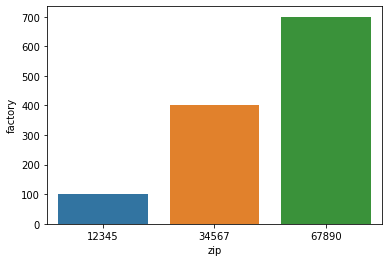

In [87]:
# Bar plot of the Dataset
sns.barplot(x="zip", y="factory", data=distance)

In [88]:
# Melting the Dataset in order to layout the Columns Efficiently
distance_long = distance.melt(id_vars="zip", var_name="location_type", value_name="distnace")

distance_long

,zip,location_type,distnace
0,12345,factory,100
1,34567,factory,400
2,67890,factory,700
3,12345,warehouse,200
4,34567,warehouse,500
5,67890,warehouse,800
6,12345,retail,300
7,34567,retail,600
8,67890,retail,900


<AxesSubplot:xlabel='location_type', ylabel='distnace'>

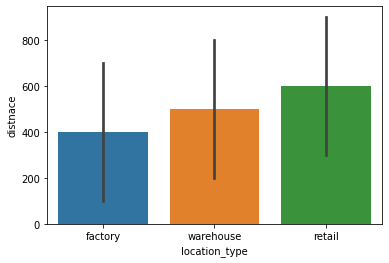

In [91]:
# Creating Bar Plot of the melted Dataset
sns.barplot(x="location_type", y="distnace", data=distance_long)

<AxesSubplot:xlabel='location_type', ylabel='distnace'>

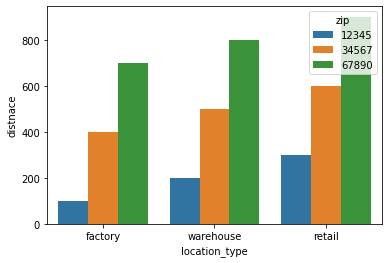

In [90]:
# Creating Bar Plot of the melted Dataset along with Hue (Zip)
sns.barplot(x="location_type", y="distnace", hue="zip", data=distance_long)